In [12]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split

In [6]:
data = pd.read_csv('C:/Users/byk11/Downloads/서울시 여성 안심 택배함 이용실적 통계.csv', engine='python')
data

,조사년월,이용실적건수
0,2020년 6월,65413
1,2020년 5월,54840
2,2020년 4월,51860
3,2020년 3월,56089
4,2020년 2월,40700
...,...,...
79,2013년 11월,7312
80,2013년 10월,5655
81,2013년 09월,3105
82,2013년 08월,2510


In [8]:
data['조사년도'] = data.조사년월.str.split(' ').str[0]
data['조사월'] = data.조사년월.str.split(' ').str[1]
data

,조사년월,이용실적건수,조사년도,조사월
0,2020년 6월,65413,2020년,6월
1,2020년 5월,54840,2020년,5월
2,2020년 4월,51860,2020년,4월
3,2020년 3월,56089,2020년,3월
4,2020년 2월,40700,2020년,2월
...,...,...,...,...
79,2013년 11월,7312,2013년,11월
80,2013년 10월,5655,2013년,10월
81,2013년 09월,3105,2013년,09월
82,2013년 08월,2510,2013년,08월


In [22]:
# 전처리 
a = data['조사년월'].tolist()
a = [word.strip('?') for word in a ] 
data['조사년월'] = a

,조사년월,이용실적건수,조사년도,조사월
83,2013년 07월,1560,?2013년,07월
82,2013년 08월,2510,2013년,08월
81,2013년 09월,3105,2013년,09월
80,2013년 10월,5655,2013년,10월
79,2013년 11월,7312,2013년,11월
...,...,...,...,...
4,2020년 2월,40700,2020년,2월
3,2020년 3월,56089,2020년,3월
2,2020년 4월,51860,2020년,4월
1,2020년 5월,54840,2020년,5월


In [25]:
df = pd.DataFrame(data.groupby(['조사년도'])["이용실적건수"].value_counts())
df

이용실적건수
조사년도   이용실적건수        
2013년  2510         1
       3105         1
       5655         1
       7312         1
       7467         1
...               ...
2020년  53890        1
       54840        1
       56089        1
       65413        1
?2013년 1560         1

[84 rows x 1 columns]

In [20]:
pd.DataFrame(data.groupby(['조사년도', '조사월'])["이용실적건수"].value_counts())

이용실적건수
조사년도   조사월 이용실적건수        
2013년  08월 2510         1
       09월 3105         1
       10월 5655         1
       11월 7312         1
       12월 7467         1
...                   ...
2020년  3월  56089        1
       4월  51860        1
       5월  54840        1
       6월  65413        1
?2013년 07월 1560         1

[84 rows x 1 columns]

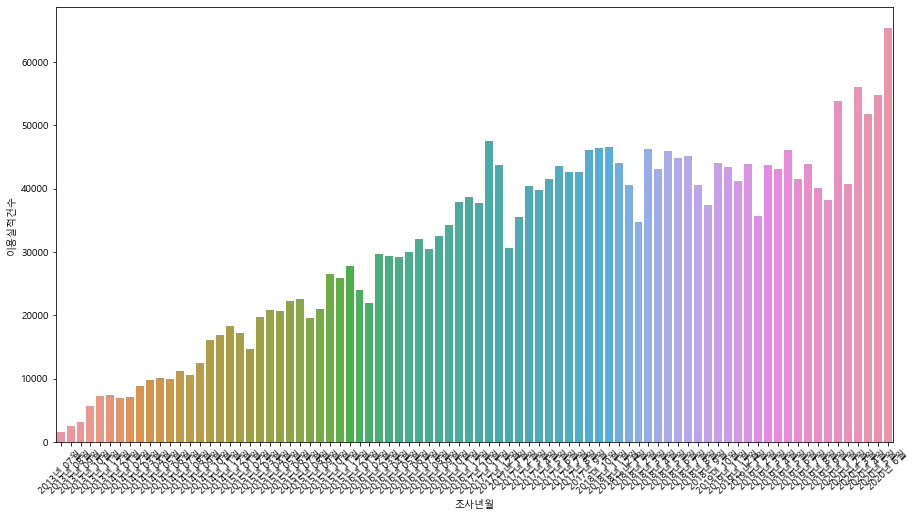

In [23]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(15,8))
plt.xticks(rotation = 45 )
sns.barplot(data=data[::-1], x="조사년월", y="이용실적건수") #, hue='max_ppl_time')